In [1]:
# pipenv install pandas seaborn pyplot scikit-learn matplotlib scipy ipywidgets ipykernel optuna streamlit plotly
 
# EDA e Visualização de Dados
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt

# ML
from sklearn.cluster import AgglomerativeClustering,BisectingKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

# Otimização
import optuna

### Carregar os Dados

In [2]:
# Carregar Dataframe
df_laptops = pd.read_csv('./datasets/laptos_new.csv')

In [3]:
# Analisar as colunas
df_laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     991 non-null    int64  
 1   brand                     991 non-null    object 
 2   model                     991 non-null    object 
 3   price                     991 non-null    float64
 4   rating                    991 non-null    int64  
 5   processor_brand           991 non-null    object 
 6   processor_tier            991 non-null    object 
 7   num_cores                 991 non-null    int64  
 8   num_threads               991 non-null    int64  
 9   ram_memory                991 non-null    int64  
 10  primary_storage_type      991 non-null    object 
 11  primary_storage_capacity  991 non-null    int64  
 12  gpu_brand                 991 non-null    object 
 13  gpu_type                  991 non-null    object 
 14  is_touch_s

In [4]:
# Visualizar os primeiros registros
df_laptops.head(10)

,index,brand,model,price,rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,primary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,os,year_of_warranty
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,287.72,63,intel,core i3,2,4,8,SSD,512,intel,integrated,False,15.6,1920,1080,windows,1
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,431.64,67,intel,core i7,4,8,16,SSD,1024,intel,integrated,False,15.6,1920,1080,windows,1
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,612.86,73,amd,ryzen 5,6,12,8,SSD,512,amd,dedicated,False,15.6,1920,1080,windows,1
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,479.62,62,intel,core i5,12,16,8,SSD,512,intel,integrated,False,14.0,1920,1080,windows,1
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,342.77,62,amd,ryzen 3,4,8,8,SSD,512,amd,integrated,False,15.6,1920,1080,windows,1
5,6,apple,Apple MacBook Air 2020 MGND3HN Laptop (Apple M...,851.41,45,apple,m1,8,8,8,SSD,256,apple,apple,False,13.3,2560,1600,mac,1
6,7,infinix,Infinix INBook Y2 Plus Laptop (11th Gen Core i...,419.65,56,intel,core i5,4,8,16,SSD,512,intel,integrated,False,15.6,1920,1080,windows,1
7,8,asus,Asus TUF Gaming F15 FX506HF-HN024W Gaming Lapt...,599.55,70,intel,core i5,6,12,8,SSD,512,nvidia,dedicated,False,15.6,1920,1080,windows,1
8,9,hp,HP 15s-fq5007TU Laptop (12th Gen Core i3/ 8GB/...,443.64,60,intel,core i3,6,8,8,SSD,512,intel,integrated,False,15.6,1920,1080,windows,1
9,10,infinix,Infinix Zerobook 2023 Laptop (13th Gen Core i9...,719.48,71,intel,core i9,14,20,32,SSD,1024,intel,integrated,False,15.6,1920,1080,windows,1


In [5]:
# Visualizar os últimos registros
df_laptops.tail(10)

,index,brand,model,price,rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,primary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,os,year_of_warranty
981,993,msi,MSI Katana 15 B13VFK-296IN Gaming Laptop (13th...,1439.09,76,intel,core i7,10,16,16,SSD,1024,nvidia,dedicated,False,15.6,1920,1080,windows,2
982,994,asus,Asus Zenbook 14 OLED 2023 UM3402YA-KM551WS Lap...,935.36,68,amd,ryzen 5,6,12,16,SSD,1024,amd,integrated,False,14.0,2880,1800,windows,1
983,995,asus,Asus Vivobook 16 2023 M1605YA-MB551WS Laptop (...,803.44,65,amd,ryzen 5,6,12,16,SSD,1024,amd,integrated,False,16.0,1920,1200,windows,1
984,996,asus,Asus Vivobook 16 2023 M1605YA-MB541WS Laptop (...,719.48,64,amd,ryzen 5,6,12,16,SSD,512,amd,integrated,False,16.0,1920,1200,windows,1
985,997,acer,Acer Nitro 5 AN515-47 NH.QL3SI.003 Gaming Lapt...,905.50,67,amd,ryzen 7,8,16,8,SSD,512,nvidia,dedicated,False,15.6,1920,1080,windows,1
986,998,asus,Asus Vivobook Pro 15 M6500QC-HN542WS Laptop (R...,791.44,68,amd,ryzen 5,6,12,16,SSD,512,nvidia,dedicated,False,15.6,1920,1080,windows,1
987,999,msi,MSI Thin GF63 12VE-070IN Gaming Laptop (12th G...,1103.27,73,intel,core i7,10,16,16,SSD,512,nvidia,dedicated,False,15.6,1920,1080,windows,2
988,1000,asus,Asus Vivobook Go 15 2023 E1504FA-NJ522WS Lapto...,539.58,59,amd,ryzen 5,4,8,8,SSD,512,amd,integrated,False,15.6,1920,1080,windows,1
989,1001,asus,Asus Zenbook 14 2023 UM3402YA-KP541WS Laptop (...,815.43,68,amd,ryzen 5,6,12,16,SSD,512,amd,integrated,False,14.0,2560,1600,windows,1
990,1002,hp,HP Chromebook 15a-na0008TU Laptop (Intel Celer...,251.74,37,intel,celeron,2,2,4,HDD,128,intel,integrated,False,15.6,1366,768,chrome,1


### EDA

In [6]:
# Estáticas das Variáveis
df_laptops.describe()

,index,price,rating,num_cores,num_threads,ram_memory,primary_storage_capacity,display_size,resolution_width,resolution_height
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,505.860747,926.687487,63.931382,8.128153,12.191726,13.047427,610.938446,15.171241,2003.503532,1181.227043
std,287.899458,688.239764,10.190575,4.215499,5.585115,5.591188,266.927666,0.938089,361.965292,263.884019
min,1.000000,117.540000,24.000000,2.000000,0.000000,2.000000,32.000000,10.100000,1080.000000,768.000000
25%,258.500000,522.850000,58.000000,6.000000,8.000000,8.000000,512.000000,14.000000,1920.000000,1080.000000
50%,507.000000,742.390000,64.000000,8.000000,12.000000,16.000000,512.000000,15.600000,1920.000000,1080.000000
75%,754.500000,1070.350000,71.000000,10.000000,16.000000,16.000000,512.000000,15.600000,1920.000000,1200.000000
max,1002.000000,5450.880000,89.000000,24.000000,32.000000,36.000000,2048.000000,18.000000,3840.000000,2560.000000


In [7]:
# Checar variável year_of_warranty
df_laptops['year_of_warranty'].unique()

array(['1', '2', 'No information', '3'], dtype=object)

In [8]:
# Ajustar variável year_of_warranty
df_laptops.loc[df_laptops['year_of_warranty'] == 'No information', 'year_of_warranty'] = 1

df_laptops['year_of_warranty'] = df_laptops['year_of_warranty'].astype(int)

In [9]:
# Transformar variável booleana em int(is_touch_screen)
df_laptops['is_touch_screen'] = df_laptops['is_touch_screen'].astype(int)

In [10]:
# Distribuição da variável brand
percentage_brand = df_laptops.value_counts('brand') / len(df_laptops) * 100
px.bar(percentage_brand, color=percentage_brand.index)

In [11]:
# Distribuição da variável processor_brand
percentage_processor_brand = df_laptops.value_counts('processor_brand') / len(df_laptops) * 100
px.bar(percentage_processor_brand, color=percentage_processor_brand.index)

<Axes: xlabel='price', ylabel='Count'>

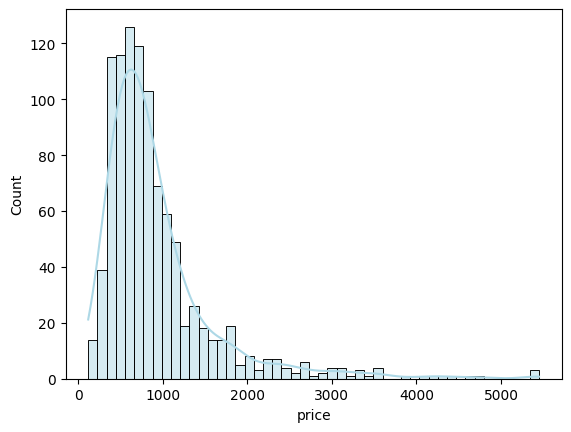

In [12]:
# Distribuição da variável price

sns.histplot(df_laptops['price'], kde=True, color='lightblue')

<Axes: xlabel='rating', ylabel='Count'>

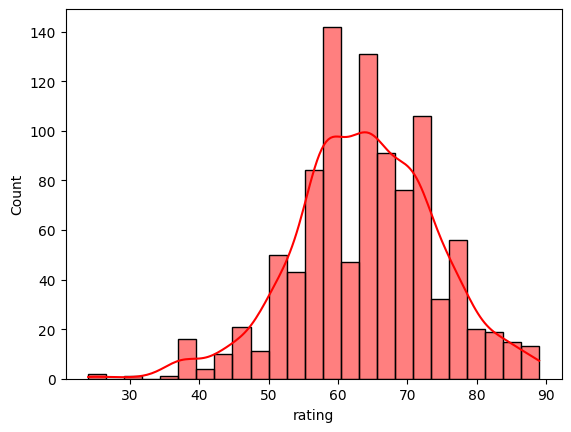

In [13]:
# Distribuição da Variável Rating
sns.histplot(df_laptops['rating'], kde=True, color='red')

In [14]:
# Plot de Distribuição (BoxPlot) por Brand e Price
px.box(df_laptops, x='price', y='brand', color='brand', orientation='h')

In [15]:
# Plot de Distribuição (BoxPlot) por Brand e Ranting
px.box(df_laptops, x='rating', y='brand', color='brand', orientation='h')

In [16]:
# Scatterplot de Price e Rating
px.scatter(df_laptops, x='price', y='rating', color='brand')

### Treinar modelo clustering Hierárquico

In [17]:
X = df_laptops.copy()

# Remover colunas desnecessárias
X.drop(columns=['index', 'model'], axis=1, inplace=True)

In [18]:
# Separando variáveis numéricas e categóricas

numeric_features = ['price', 'rating', 'num_cores', 'num_threads', 'ram_memory', 'primary_storage_capacity','display_size', 'resolution_width', 'resolution_height']

categorical_features = ['brand', 'processor_brand', 'gpu_brand','gpu_type','os']

In [19]:
# Aplicar transformações
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

In [20]:
preprocessor = ColumnTransformer(
  transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
  ]
)

In [21]:
# Transformar os dados
X_transformed = preprocessor.fit_transform(X)

In [22]:
# Visualizar X_transformed
X_transformed

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 13874 stored elements and shape (991, 54)>

In [23]:
def hierarchical_aglomerative_objective(trial):
  # Definindo os hiperparâmetros a serem ajustados
  n_clusters = trial.suggest_int('n_clusters', 10, 150)
  
  # Linkage = Critério de distância entre dois conjuntos para formar os clusters

  # Ward = Variância
  # Average = Media
  # Complete = Máxima
  # Single = Mínima
  linkage = trial.suggest_categorical('linkage', ['ward', 'average', 'complete', 'single'])

  # Instância o modelo
  hierarchical_model = AgglomerativeClustering(linkage=linkage, n_clusters=n_clusters)

  # Treinar o modelo e já executar a clusterização
  y = hierarchical_model.fit_predict(X_transformed.toarray())

  # Calcular o Silhouette Score
  silhouette_avg = silhouette_score(X_transformed, y)

  return silhouette_avg

In [24]:
# Criar um estudo no Optuna
search_space_ag = {"n_clusters": range(10, 151), 'linkage':['ward', 'average', 'complete', 'single']}
sampler_ag = optuna.samplers.GridSampler(search_space=search_space_ag)
study_ag = optuna.create_study(direction='maximize', sampler=sampler_ag)

[I 2025-03-26 15:52:33,962] A new study created in memory with name: no-name-8dae2c57-a484-48c5-b656-d770eaa4201a


In [25]:
# Executar estudo do Optuna para Aglomerative
study_ag.optimize(hierarchical_aglomerative_objective, n_trials=600)

[I 2025-03-26 15:52:34,039] Trial 0 finished with value: 0.2234907963314824 and parameters: {'n_clusters': 108, 'linkage': 'average'}. Best is trial 0 with value: 0.2234907963314824.
[I 2025-03-26 15:52:34,087] Trial 1 finished with value: 0.17524794730527618 and parameters: {'n_clusters': 44, 'linkage': 'complete'}. Best is trial 0 with value: 0.2234907963314824.
[I 2025-03-26 15:52:34,129] Trial 2 finished with value: 0.18192511775951023 and parameters: {'n_clusters': 57, 'linkage': 'average'}. Best is trial 0 with value: 0.2234907963314824.
[I 2025-03-26 15:52:34,169] Trial 3 finished with value: 0.17426651499876017 and parameters: {'n_clusters': 46, 'linkage': 'complete'}. Best is trial 0 with value: 0.2234907963314824.
[I 2025-03-26 15:52:34,212] Trial 4 finished with value: 0.22831449937222206 and parameters: {'n_clusters': 140, 'linkage': 'complete'}. Best is trial 4 with value: 0.22831449937222206.
[I 2025-03-26 15:52:34,257] Trial 5 finished with value: 0.2354443546476447 and 

In [26]:
# Mostrar melhor configuração do Optuna (Aglomerative)
best_params_ag = study_ag.best_params

print(f'Clusters = {best_params_ag["n_clusters"]}')
print(f'Linkage = {best_params_ag["linkage"]}')

Clusters = 149
Linkage = ward


In [27]:
def hierarchical_divisive_objective(trial):
  # Definindo os hiperparâmetros a serem ajustados
  n_clusters = trial.suggest_int('n_clusters', 10, 150)
  
  # Linkage = Critério de distância entre dois conjuntos para formar os clusters

  # Instância o modelo
  hierarchical_model = BisectingKMeans(n_clusters=n_clusters)

  # Treinar o modelo e já executar a clusterização
  y = hierarchical_model.fit_predict(X_transformed.toarray())

  # Calcular o Silhouette Score
  silhouette_avg = silhouette_score(X_transformed, y)

  return silhouette_avg

In [28]:
# Criar um estudo no Optuna
search_space_di = {"n_clusters": range(10, 151)}
sampler_di = optuna.samplers.GridSampler(search_space=search_space_di)
study_di = optuna.create_study(direction='maximize', sampler=sampler_di)

[I 2025-03-26 15:53:41,750] A new study created in memory with name: no-name-99bd50a8-36a5-4b39-ba95-acd5661b095b


In [29]:
# Executar estudo do Optuna para Aglomerative
study_di.optimize(hierarchical_divisive_objective, n_trials=200)

c:\Users\felipe.fardo\.virtualenvs\hierarchical_cluestering-YYeuIcfl\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "c:\Users\felipe.fardo\.virtualenvs\hierarchical_cluestering-YYeuIcfl\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\felipe.fardo\.pyenv\pyenv-win\versions\3.12.1\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\felipe.fardo\.pyenv\pyenv-win\versions\3.12.1\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, pr

In [30]:
# Mostrar melhor configuração do Optuna (Divise)

best_params_di = study_di.best_params

print(f'Clusters = {best_params_di['n_clusters']}')

Clusters = 145


In [31]:
# Criar Modelo com melhor configuração (Aglomerative)

best_model = AgglomerativeClustering(
  n_clusters=best_params_ag['n_clusters'],
  linkage=best_params_ag['linkage']
)

In [32]:
# Treinar Modelo
best_model.fit(X_transformed.toarray())

AgglomerativeClustering(n_clusters=149)

In [33]:
# Verificar Silhouette Score
best_score = silhouette_score(X_transformed, best_model.labels_)
best_score

np.float64(0.32745480721431686)

In [34]:
# Criar Coluna com cluster escolhido no Dataframe original
df_laptops['cluster'] = best_model.labels_

### Visualizar Resultados

In [35]:
# Mostrar Chart com Trails do Optuna
fig = optuna.visualization.plot_optimization_history(study_ag)
fig.show()

In [36]:
# Mostrar o dendograma
model_de = linkage(X_transformed.toarray(), method=best_params_ag['linkage'], optimal_ordering=True)

Text(0, 0.5, 'Distância')

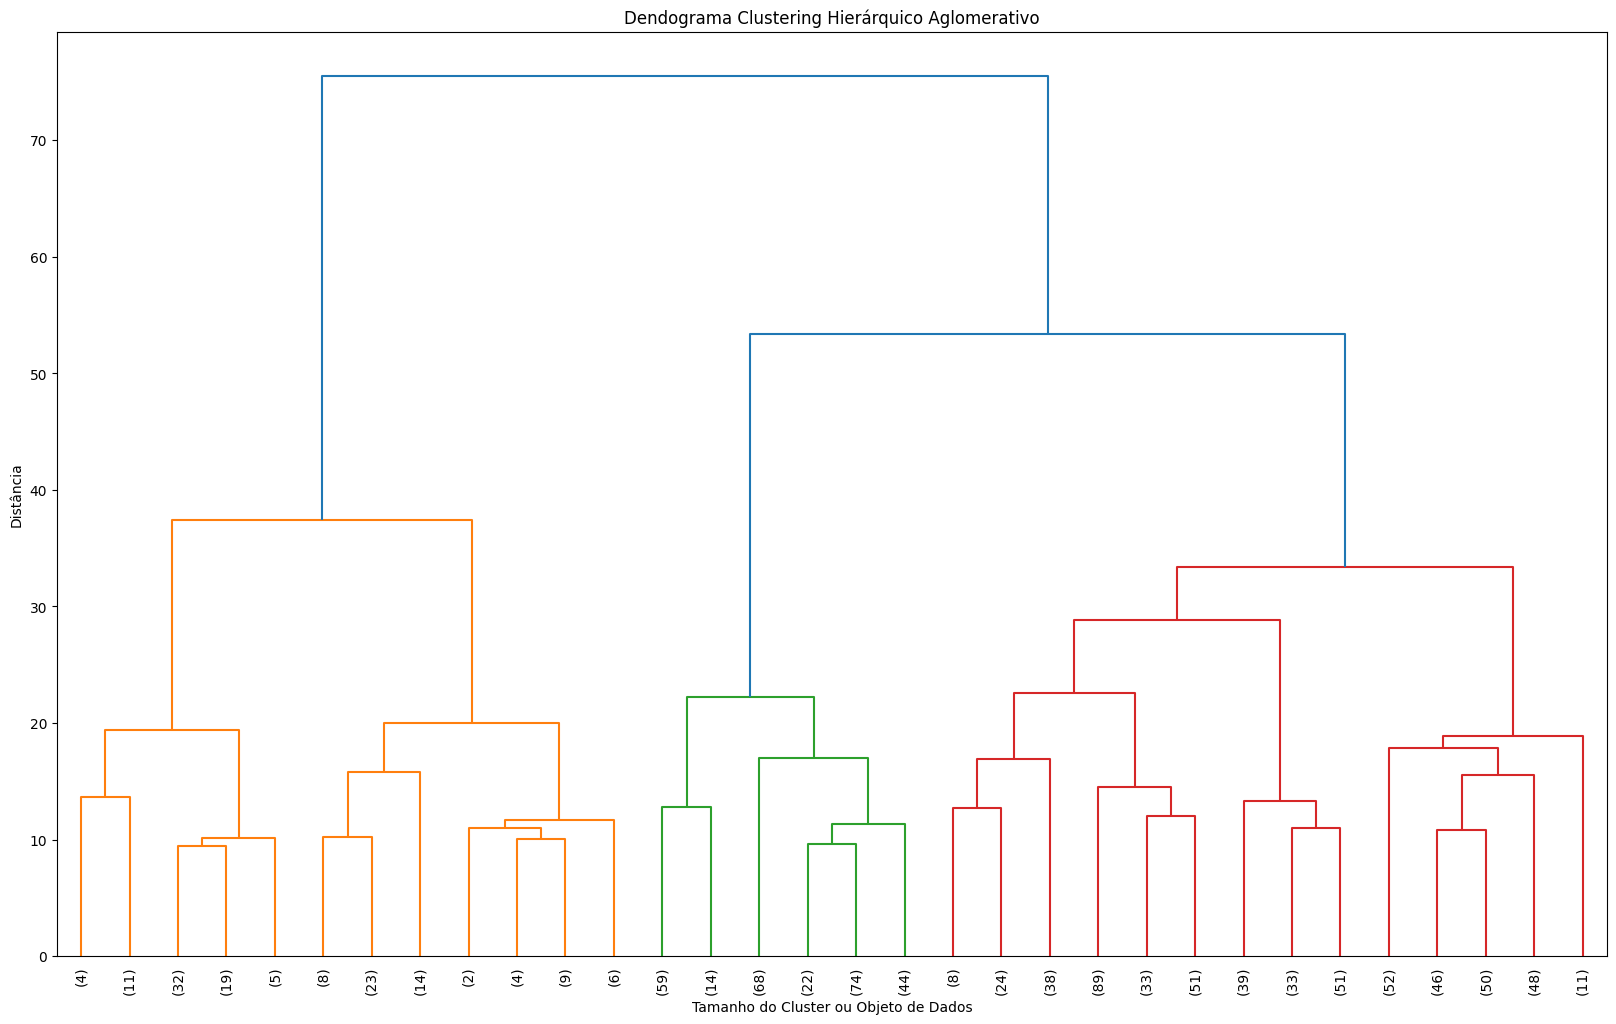

In [48]:
plt.figure(figsize=(20,12))
dendrogram(model_de, truncate_mode='lastp', p=32, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendograma Clustering Hierárquico Aglomerativo')
plt.xlabel('Tamanho do Cluster ou Objeto de Dados')
plt.ylabel('Distância')

In [50]:
# Cortar o dendrograma
cluster_de_scipy = cut_tree(model_de, height=32)
len(np.unique(cluster_de_scipy))

5

In [54]:
# Cruzamento entre brand e price, apresentando os clusters
px.scatter(df_laptops, x='brand', y='price', color='cluster')

In [52]:
# Cruzamento entre brand e price, apresentando os clusters
px.scatter(df_laptops, x='cluster', y='price', color='brand')

In [53]:
# Cruzamento entre brand e price, apresentando os clusters
px.scatter(df_laptops, x='brand', y='rating', color='cluster')

In [55]:
# Cruzamento entre brand e price, apresentando os clusters
px.scatter(df_laptops, x='cluster', y='rating', color='brand')

In [57]:
# Dsitribuição da variável cluster

percentage_cluster = df_laptops.value_counts('cluster') / len(df_laptops) * 100
px.bar(percentage_cluster, color=percentage_cluster.index)

In [61]:
# Dsitribuição da variável cluster

qtde_cluster = df_laptops.value_counts('cluster')
px.bar(qtde_cluster, color=qtde_cluster.index)

### Salvar o modelo, PreProcessor e CSV Atualizado

In [ ]:
# Salvar Modelo e PreProcessor
import joblib

# Salvar o modelo
joblib.dump(best_model, './model_clustering_laptops.pkl')

# Salvar o Preprocessor
joblib.dump(preprocessor, './preprocessor_clustering_laptops.pkl')

['./preprocessor_clustering_laptops.pkl']

In [63]:
# Salvar CSV atualizado com dados do Cluster
df_laptops.to_csv('./datasets/clustering_laptops.csv', index=False)